In [2]:
from google.colab import auth
auth.authenticate_user()

import sys
from google.colab import drive
drive.mount('/content/gdrive')

%cd gdrive/My Drive/Colab Notebooks/VGG/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/VGG


In [0]:
#importing required libraries
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
from torch.autograd import Variable

In [0]:
class VGG16(nn.Module):
    def __init__(self, num_classes=1000):
        super(VGG16, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
#         self.bn1 = nn.BatchNorm2d(64)
#         self.relu = nn.ReLU(inplace=True)
        
        self.conv2 = nn.Conv2d(64,64, kernel_size=3, padding=1)
        self.maxPool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(64,128, kernel_size=3, padding=1)
        #self.bn2 = nn.BatchNorm2d(128)
        
        self.conv4 = nn.Conv2d(128,128, kernel_size=3, padding=1)
        
        self.conv5 = nn.Conv2d(128,256, kernel_size=3, padding=1)
        #self.bn3 = nn.BatchNorm2d(256)
        
        self.conv6 = nn.Conv2d(256,256, kernel_size=3, padding=1)
        self.conv7 = nn.Conv2d(256,256, kernel_size=1, padding=0)
        
        self.conv8 = nn.Conv2d(256,512, kernel_size=3, padding=1)
        #self.bn4 = nn.BatchNorm2d(512)
        
        self.conv9 = nn.Conv2d(512,512, kernel_size=3, padding=1)
        self.conv10 = nn.Conv2d(512,512, kernel_size=1, padding=0)
        
        self.conv11 = nn.Conv2d(512,512, kernel_size=3, padding=1)
        self.conv12 = nn.Conv2d(512,512, kernel_size=3, padding=1)
        self.conv13 = nn.Conv2d(512,512, kernel_size=1, padding=0)
        
        self.linear1 = nn.Linear(512*7*7, 4096)
        self.linear2 = nn.Linear(4096, 4096)
        self.linear3 = nn.Linear(4096, num_classes)
        
    def forward(self, x):
        out= self.conv1(x)
        out = self.conv2(out)
        out = self.maxPool(out)
        
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.maxPool(out)
        
        out = self.conv5(out)
        out = self.conv6(out)
        out = self.conv7(out)
        out = self.maxPool(out)
        
        out = self.conv8(out)
        out = self.conv9(out)
        out = self.conv10(out)
        out = self.maxPool(out)
        
        out = self.conv11(out)
        out = self.conv12(out)
        out = self.conv13(out)

        out = self.maxPool(out)
        
        out = out.view(out.size(0),-1)
        out = self.linear1(out)
        out = self.linear2(out)
        out = self.linear3(out)
        
        return out
        
        

In [0]:
class VGG19(nn.Module):
    def __init__(self, num_classes=1000):
        super(VGG19, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        
        self.conv2 = nn.Conv2d(64,64, kernel_size=3, padding=1)
        self.maxPool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(64,128, kernel_size=3, padding=1)
        #self.bn2 = nn.BatchNorm2d(128)
        
        self.conv4 = nn.Conv2d(128,128, kernel_size=3, padding=1)
        
        self.conv5 = nn.Conv2d(128,256, kernel_size=3, padding=1)
        #self.bn3 = nn.BatchNorm2d(256)
        
        self.conv6 = nn.Conv2d(256,256, kernel_size=3, padding=1)
        self.conv7 = nn.Conv2d(256,256, kernel_size=3, padding=1)
        
        self.conv8 = nn.Conv2d(256,512, kernel_size=3, padding=1)
        #self.bn4 = nn.BatchNorm2d(512)
        
        self.conv9 = nn.Conv2d(512,512, kernel_size=3, padding=1)
        self.conv10 = nn.Conv2d(512,512, kernel_size=1, padding=0)
        
        self.conv11 = nn.Conv2d(512,512, kernel_size=3, padding=1)
        self.conv12 = nn.Conv2d(512,512, kernel_size=3, padding=1)
        self.conv13 = nn.Conv2d(512,512, kernel_size=1, padding=0)
        
        self.linear1 = nn.Linear(512*7*7, 4096)
        self.linear2 = nn.Linear(4096, 4096)
        self.linear3 = nn.Linear(4096, num_classes)
        
    def forward(self, x):
        out= self.conv1(x)
        out = self.conv2(out)
        out = self.maxPool(out)
        
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.maxPool(out)
        
        out = self.conv5(out)
        out = self.conv6(out)
        out = self.conv6(out)
        out = self.conv6(out)
        out = self.conv7(out)
        out = self.maxPool(out)
        
        out = self.conv8(out)
        out = self.conv9(out)
        out = self.conv9(out)
        out = self.conv9(out)
        out = self.maxPool(out)
        
        out = self.conv9(out)
        out = self.conv9(out)
        out = self.conv9(out)
        out = self.conv9(out)

        out = self.maxPool(out)
        
        out = out.view(out.size(0),-1)
        out = self.linear1(out)
        out = self.linear2(out)
        out = self.linear3(out)
        
        return out

In [11]:
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader

transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

dataset_train = CIFAR10(root='../data', train=True, 
            download=True, transform=transform)
dataset_test = CIFAR10(root='../data', train=False, 
             download=True, transform=transform)
dataset_train, valid_ds = torch.utils.data.random_split(dataset_train, (20000, 30000))
dataset_test, valid_ds = torch.utils.data.random_split(dataset_test, (2000, 8000))

train_loader = DataLoader(dataset_train, batch_size=128, 
                        shuffle=True)
test_loader = DataLoader(dataset_test, batch_size=128, 
                       shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model=VGG16()
model=model.to(device)

In [0]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model=VGG19()
model=model.to(device)

In [0]:
criterio=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(), lr=0.01, weight_decay=0.0005)
lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)
NUM_EPOCHS=10

In [29]:
model.train()
for epoch in range(NUM_EPOCHS):
  for imgs, classes in train_loader:
    #print(imgs.shape, classes.shape)
    imgs, classes=imgs.to(device), classes.to(device)
    outputs = model(imgs)

    loss = criterio(outputs, classes)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _, preds = torch.max(outputs, 1)
    #print(loss.item())
    #print(preds)

  if epoch%10 == 0:
      print('Epoch {}: Loss = {} Accuracy = {} '.format(epoch+1, loss.item(),torch.sum(preds == classes).item()/32))

RuntimeError: ignored

tensor([3, 9, 3, 6])


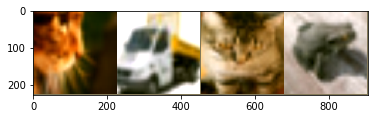

In [22]:
# Our images are normalized so denormalize then and convert them to numpy
from torchvision.utils import make_grid
import numpy as np
import matplotlib.pyplot as plt
def imshow(img, title=None):
    img = img.numpy().transpose((1, 2, 0))
    
    mean = np.array([0.514, 0.476, 0.349])
    std = np.array([0.278, 0.258, 0.287])

    #mean=[0.485, 0.456, 0.406]
    #std=[0.229, 0.224, 0.225]
    
    img = std*img + mean
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)
    
images, labels = next(iter(train_loader))
grid_img = make_grid(images[:4], nrow=4)
print(labels[:4])
imshow(grid_img)

label:  tensor([4, 8, 6, 1, 3, 9, 8, 0, 8, 1])
Prediction:  tensor([0, 1, 4, 1, 4, 5, 5, 8, 8, 5], device='cuda:0')


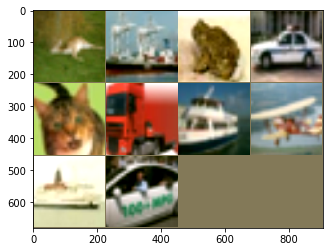

In [23]:
imgs, classes = next(iter(test_loader))
_, preds = torch.max(model(imgs.to(device)),1)
grid_img = make_grid(imgs[:10], nrow=4)
print("label: ",classes[:10])
print("Prediction: ",preds[:10])
imshow(grid_img)